In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
import pandas as pd

In [3]:
# train : datetime을 날짜로 해석하기 위해 parse_dates 옵션에 추가
train= pd.read_csv("C:\\kaggle\\bike\\train.csv", parse_dates=["datetime"])
train.shape

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# test : datetime을 날짜로 해석하기 위해 parse_dates 옵션에 추가
test= pd.read_csv("C:\\kaggle\\bike\\test.csv", parse_dates=["datetime"])

test.shape

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
# 결측치 확인
train.isnull().sum(axis=0)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
test.isnull().sum() 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

<AxesSubplot:>

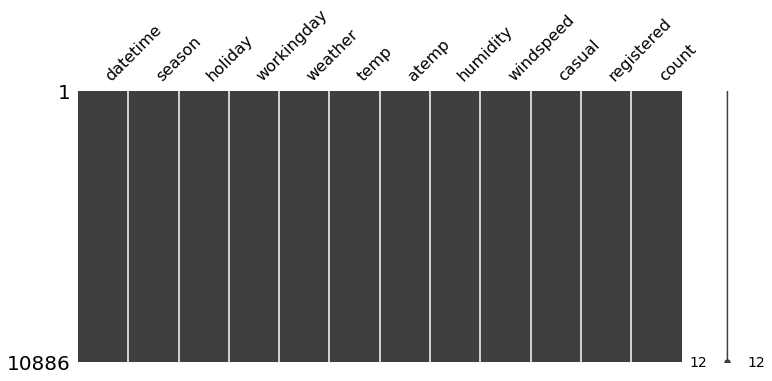

In [7]:
import missingno as msno
msno.matrix(train,figsize=(12,5))
#흰색선이 보이지 않으므로 결측값 없음 

년,월,일,시 에 따른 평균 대여량 구하기 

In [8]:
# datetime에서 년,월,일,시,분,초를 추출하여 각각의 column으로 구성


In [9]:
train['year']=train['datetime'].dt.year # 년도 추출 
train['month']=train['datetime'].dt.month # 월도 추출 
train['day']=train['datetime'].dt.day # 일 추출 
train['hour']=train['datetime'].dt.hour # 시 추출 
train['minute']=train['datetime'].dt.minute # 분 추출 
train['second']=train['datetime'].dt.second # 초 추출 
train['dayofweek']=train['datetime'].dt.dayofweek #요일 추출 , 월요일:0, 일요일:6

In [10]:
test['year']=test['datetime'].dt.year # 년도 추출 
test['month']=test['datetime'].dt.month # 월도 추출 
test['day']=test['datetime'].dt.day # 일 추출 
test['hour']=test['datetime'].dt.hour # 시 추출 
test['minute']=test['datetime'].dt.minute # 분 추출 
test['second']=test['datetime'].dt.second # 초 추출 
test['dayofweek']=test['datetime'].dt.dayofweek #요일 추출 , 월요일:0, 일요일:6

탐색적 데이터 분석 (EDA)

기술통계 분석 

In [11]:
train.describe()# 기술통계

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000


<AxesSubplot:xlabel='second', ylabel='count'>

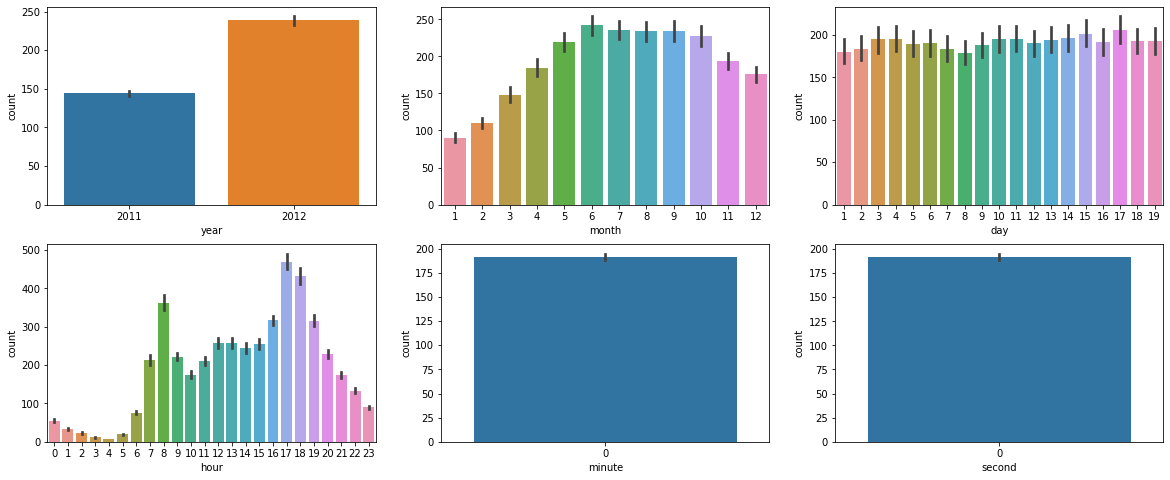

In [12]:
import matplotlib.pyplot as plt
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) =plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(20,8)

import seaborn as sns 
sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

2011년도 보다 2012년도가 자전거 수요량이 상승했다. 

겨울보다 여름에 자전거 수요량이 상승한다. 

연초보다 연말에 자전거 수요량이 소폭 상승한다.

새벽시간보다 출퇴근 시간에 자전거 수요량이 상승한다

<AxesSubplot:xlabel='hour', ylabel='count'>

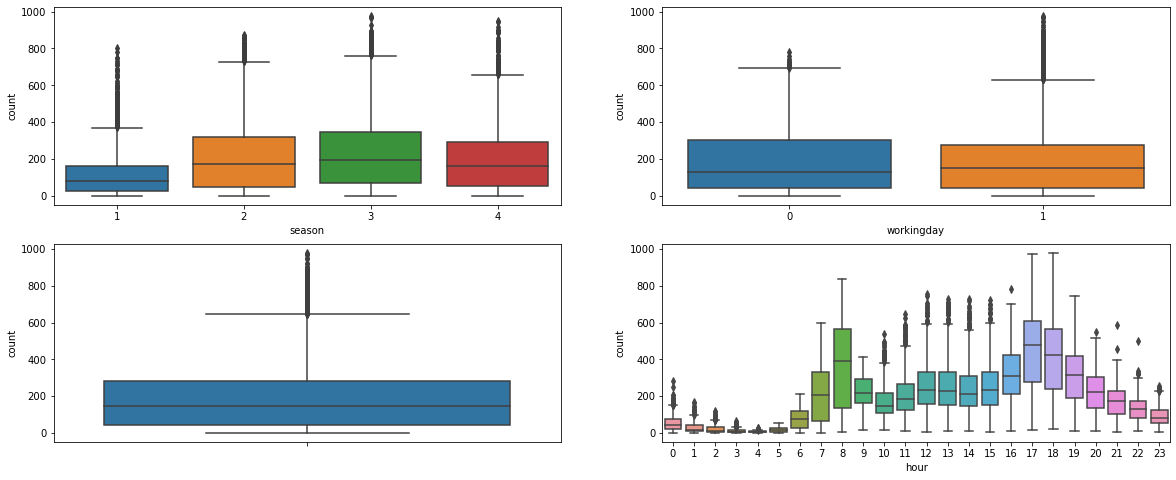

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,8)

sns.boxplot(data=train, x="season", y="count", ax=axes[0][0])
sns.boxplot(data=train, x="workingday", y="count", ax=axes[0][1])
sns.boxplot(data=train, orient="v", y="count", ax=axes[1][0]) 
#상자 그림 작성 (세로방향) orient“v” | “h”, optional
sns.boxplot(data=train, x="hour", y="count", ax=axes[1][1])

겨울 보다 여름 가을에 수요량이 더 많은 것을 확인할 수 있다. 

겨울에는 극단치 데이터가 많은 편이다. 

근무시간이 아닐 때 보다 근무시간에 극단치 데이터가 많은 편이다. 

출퇴근 시간에 자전거 수요량이 높음을 확인할 수 있다. 

In [14]:
train['dayofweek'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int64)

In [15]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

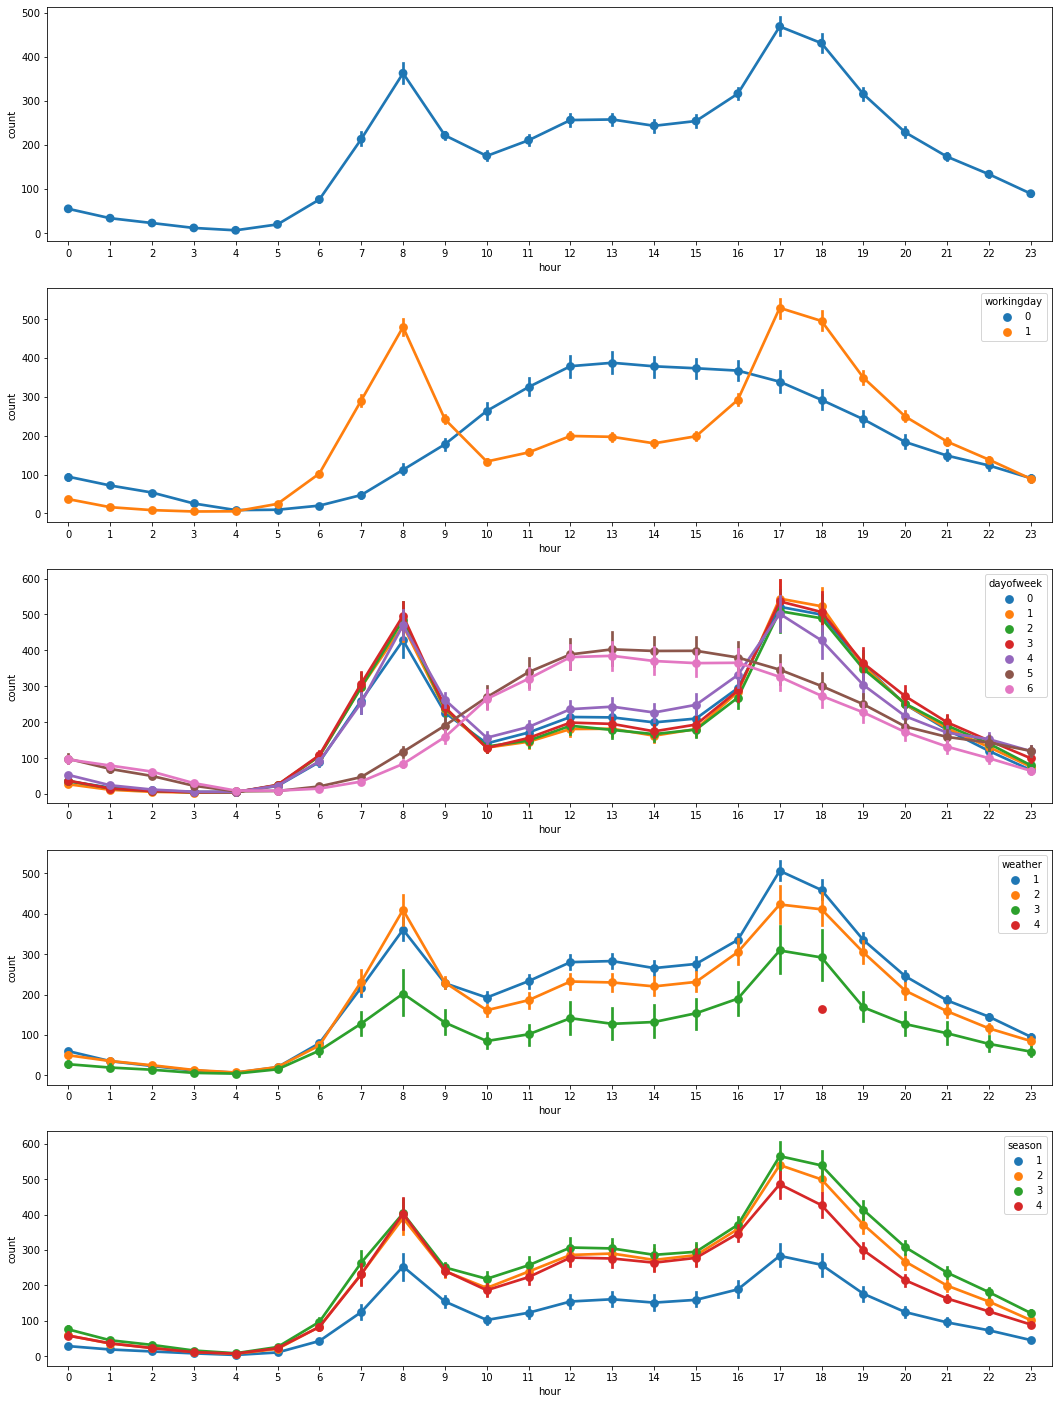

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)
# x, y, hue names of variables in data or vector data, optional
sns.pointplot(data=train, x="hour", y="count",hue='workingday' ,ax=ax2)
sns.pointplot(data=train, x="hour", y="count",hue='dayofweek' ,ax=ax3)
sns.pointplot(data=train, x="hour", y="count",hue='weather' ,ax=ax4)
sns.pointplot(data=train, x="hour", y="count",hue='season' ,ax=ax5)

<AxesSubplot:xlabel='humidity', ylabel='count'>

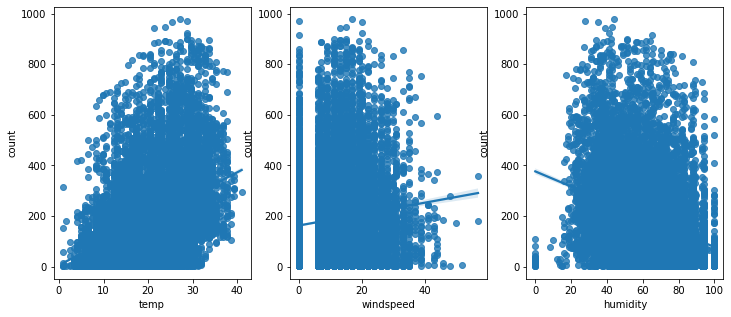

In [17]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)

sns.regplot(x="temp",y="count",data=train, ax=ax1)
sns.regplot(x="windspeed",y="count",data=train, ax=ax2)
sns.regplot(x="humidity",y="count",data=train, ax=ax3)

자전거 수요량과 기후는 양의 상관관계

풍속은 적은 양의 상관관계 

습도와는 음의 상관관계를 보인다.  

연도별 월별 자전거 대여량 구하기

In [18]:
#2011년과 2012년 따로 구분하여 재출력 하고자함 
def ym(mydt):
    return"{0}-{1}".format(mydt.year,mydt.month)

train['year_month']=train['datetime'].apply(ym)
train[['datetime','year_month']]

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1
...,...,...
10881,2012-12-19 19:00:00,2012-12
10882,2012-12-19 20:00:00,2012-12
10883,2012-12-19 21:00:00,2012-12
10884,2012-12-19 22:00:00,2012-12


<AxesSubplot:xlabel='year_month', ylabel='count'>

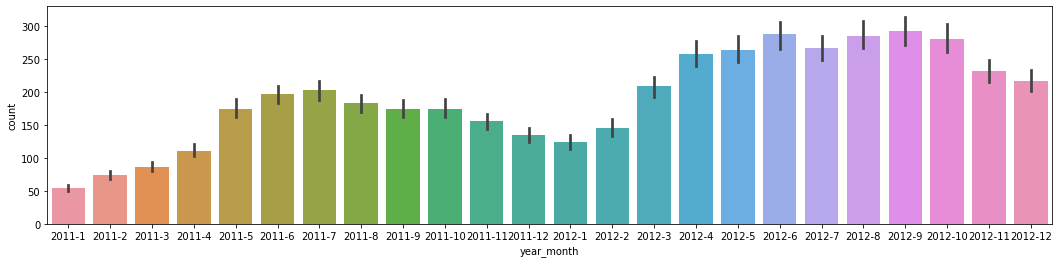

In [19]:
fig,axes=plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x="year_month", y="count",ax=axes)
# 2012년에 자전거 대여량증가, 겨울보다 여름에 증가 

아웃라이어 제거

정상범위 데이터 : count열값-count열값평균 < 3*(count.std)



In [20]:
import numpy as np

trainWithoutOutliers=train[np.abs(train["count"]-train["count"].mean()) <= (train['count'].std()*3)]

print(train.shape)
print(trainWithoutOutliers.shape) # Outliers 제거 확인

(10886, 20)
(10739, 20)


데이터 보정

In [21]:
#풍속이 0인 것과 0이 아닌 것을 구분하여 저장 
trainWind0=train.loc[train['windspeed']==0]
trainWindNot0=train.loc[train['windspeed']!=0]

print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 20)
(9573, 20)


풍속 등 각 필드에 0으로 저장되어 있는 값을 근사값으로 보정

In [22]:
# 머신러닝 랜덤포레스트로 풍속 예측 
from sklearn.ensemble import RandomForestClassifier

#data의 windspeed값이 0인 데이터를 랜덤 포레스트를 이용하여 예측한 값으로 대체 
def predict_windspeed(data): #(출력확인용)
    #풍속 예측에 사용되는 변수 
    wCol=['season','weather','humidity','temp','atemp']
    
    #풍속을 0인 것과 0이 아닌 것으로 구분
    dataWind0=data.loc[data['windspeed']==0]
    dataWindNot0=data.loc[data['windspeed']!=0]
    
    #랜덤포레스트 분류기 생성
    rfModel=RandomForestClassifier()
    dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype("str")
    
    # wCol > 풍속학습 > 모델완성 
    rfModel.fit(dataWindNot0[wCol], dataWindNot0['windspeed']) #(학습대상, 학습자료)
    
    #학습한 모델로 풍속 0에 대한 데이터 예측 
    preValue=rfModel.predict(X=dataWind0[wCol])
    print(preValue)
    
    #풍속이 0인 것과 0이 아닌 것으로 분류 
    predictWind0=dataWind0
    predictWindNot0=dataWindNot0
    
    #예측값을 풍속이 0인 데이터에 대입
    predictWind0['windspeed']=preValue
    #풍속이 0이 아닌 데이터와 풍속이 0인 데이터 병합하여 data에 대입
    data=predictWindNot0.append(predictWind0)
    return data

In [23]:
print(predict_windspeed(train))

['6.0032' '6.0032' '6.0032' ... '6.0032' '12.998' '6.0032']
                 datetime  season  holiday  workingday  weather   temp  \
5     2011-01-01 05:00:00       1        0           0        2   9.84   
10    2011-01-01 10:00:00       1        0           0        1  15.58   
11    2011-01-01 11:00:00       1        0           0        1  14.76   
12    2011-01-01 12:00:00       1        0           0        1  17.22   
13    2011-01-01 13:00:00       1        0           0        2  18.86   
...                   ...     ...      ...         ...      ...    ...   
10826 2012-12-17 12:00:00       4        0           1        2  16.40   
10829 2012-12-17 15:00:00       4        0           1        2  17.22   
10846 2012-12-18 08:00:00       4        0           1        1  15.58   
10860 2012-12-18 22:00:00       4        0           1        1  13.94   
10862 2012-12-19 00:00:00       4        0           1        1  12.30   

        atemp  humidity windspeed  casual  register

In [24]:
def predict_windspeed2(data): #(실제데이터 보정용)
    #풍속 예측에 사용되는 변수 
    wCol=['season','weather','humidity','temp','atemp']
    
    #풍속을 0인 것과 0이 아닌 것으로 구분
    dataWind0=data.loc[data['windspeed']==0]
    dataWindNot0=data.loc[data['windspeed']!=0]
    
    #랜덤포레스트 분류기 생성
    rfModel=RandomForestClassifier()
    dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype("str")
    
    # wCol > 풍속학습 > 모델완성 
    rfModel.fit(dataWindNot0[wCol], dataWindNot0['windspeed']) #(학습대상, 학습자료)
    
    #학습한 모델로 풍속 0에 대한 데이터 예측 
    preValue=rfModel.predict(X=dataWind0[wCol])
    print(preValue)
    
    #풍속이 0인 것과 0이 아닌 것으로 분류 
    predictWind0=dataWind0
    predictWindNot0=dataWindNot0
    
    #예측값을 풍속이 0인 데이터에 대입
    predictWind0['windspeed']=preValue
    #풍속이 0이 아닌 데이터와 풍속이 0인 데이터 병합하여 data에 대입
    data=predictWindNot0.append(predictWind0)

    # 행이름 reset(data만 따로 가져오기 위함)
    data.reset_index(inplace=True)
    data.drop('index',inplace=True, axis=1)
    return data

In [25]:
train=predict_windspeed2(train)
test=predict_windspeed2(test)

['6.0032' '6.0032' '6.0032' ... '6.0032' '12.998' '7.0015']
['8.9981' '8.9981' '6.0032' '8.9981' '12.998' '12.998' '7.0015' '6.0032'
 '11.0014' '6.0032' '7.0015' '6.0032' '7.0015' '7.0015' '6.0032' '6.0032'
 '6.0032' '6.0032' '7.0015' '6.0032' '6.0032' '6.0032' '6.0032' '6.0032'
 '6.0032' '6.0032' '6.0032' '7.0015' '6.0032' '7.0015' '7.0015' '7.0015'
 '12.998' '7.0015' '7.0015' '8.9981' '7.0015' '6.0032' '7.0015' '6.0032'
 '7.0015' '8.9981' '8.9981' '6.0032' '6.0032' '6.0032' '6.0032' '6.0032'
 '6.0032' '6.0032' '6.0032' '12.998' '7.0015' '7.0015' '46.0022' '8.9981'
 '6.0032' '8.9981' '12.998' '12.998' '15.0013' '7.0015' '6.0032' '7.0015'
 '7.0015' '7.0015' '7.0015' '7.0015' '11.0014' '6.0032' '11.0014'
 '11.0014' '7.0015' '7.0015' '6.0032' '6.0032' '6.0032' '7.0015' '6.0032'
 '6.0032' '8.9981' '7.0015' '8.9981' '11.0014' '12.998' '11.0014'
 '23.9994' '7.0015' '7.0015' '12.998' '12.998' '6.0032' '16.9979' '6.0032'
 '6.0032' '19.0012' '12.998' '12.998' '6.0032' '8.9981' '11.0014' '12.99

<AxesSubplot:xlabel='windspeed', ylabel='count'>

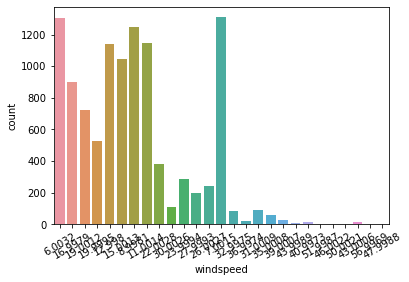

In [26]:
fig, ax1 = plt. subplots()
plt.sca(ax1)
plt.xticks(rotation=30)

sns.countplot(data=train, x="windspeed", ax=ax1)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

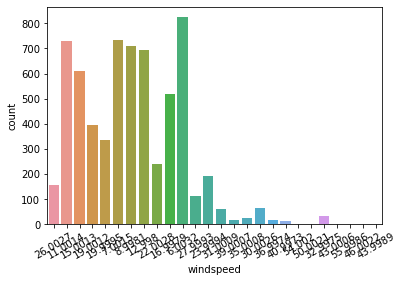

In [27]:
fig, ax1 = plt. subplots()
plt.sca(ax1)
plt.xticks(rotation=30)

sns.countplot(data=test, x="windspeed", ax=ax1)

자전거 대여수 예상 값 출력

먼저 종속변수들을 분석해야한다. 

연속형변수는 dtype이 float64(실수형) 인 변수들을 의미한다.

In [28]:
#feature selection 
# 연속형(temp, humi, wind, atemp), 범주형 변수는 타입을 category로 변경 

train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'year_month'],
      dtype='object')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  object        
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [30]:
feature_names=['season','holiday','workingday','weather','temp','atemp',
              'humidity','windspeed','year','hour','dayofweek']

#수리형을 범주형으로 바꿔주는 for 문 
c_f_n =['season','holiday','workingday','weather',
        'year','hour','dayofweek','month']

for v in c_f_n:
    #dtype이 int64라서 category로 변경
    train[v]=train[v].astype("category")
    test[v]=train[v].astype("category")

In [31]:
train.info() # dtype 변경 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  object        
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  category      
 13  month       10886 non-null  category      
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  category      
 16  minute      10886 non-

In [32]:
# 4개의 변수로 되어있음 확인 
train['season'].dtypes 
test['season'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

In [33]:
xtrain=train[feature_names]
xtrain.shape #(10886, 11)
xtest=test[feature_names]
xtest.shape #(6493, 11)

(6493, 11)

In [34]:
ytrain=train['count'] #레이블(정답)
ytrain.shape

(10886,)

RMSLE 실제치와 예측치의 차이 함수 구현

In [35]:
def rmsle(predicted_value, actual_value):
    predicted_value=np.array(predicted_value)
    actual_value=np.array(actual_value)
    log_predict=np.log(predicted_value+1)
    log_actual=np.log(actual_value+1)
    diff=log_predict-log_actual
    diff=np.square(diff)
    mean_diff=diff.mean()
    score=np.sqrt(mean_diff)
    return score

In [36]:
from sklearn.metrics import make_scorer
rmsle_scorer=make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [37]:
# k-fold corss_validation # 핸즈온 머신러닝 p.127 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from pandas import DataFrame

kfold=KFold(n_splits=10, shuffle=True, random_state=42)

from sklearn.ensemble import RandomForestRegressor

model =RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42)

%time score=cross_val_score(model, xtrain, ytrain,cv=kfold, scoring=rmsle_scorer )
print(score.mean())

Wall time: 5.39 s
0.3312433956407076


In [38]:
model.fit(xtrain,ytrain)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [39]:
prediction=model.predict(xtest)
prediction

array([ 2.12      , 89.43      , 89.67      , ..., 92.96166667,
       82.90166667, 69.02      ])

In [42]:
submission=pd.read_csv("C:\\kaggle\\bike\\sampleSubmission.csv")
submission['count']=prediction
submission.to_csv("result.csv",index=False)